<a href="https://colab.research.google.com/github/mehmetoktay2016/EvFiyatTahmini/blob/master/rfm_analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install jupyter-to-medium

In [ ]:
# Kütüphanelerin okunması
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd

# veri dosyasının okunması

df_2010_2011 = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2010-2011")
df = df_2010_2011.copy()

In [ ]:
# Tüm degisken ve gözlemleri görmek icin
pd.set_option('display.max_columns', None); 
pd.set_option('display.max_rows', None);


# virgulden sonra gösterilecek olan sayı sayısı
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# İlk 5 gözlemi gorme.
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [ ]:
# Bos deger sorgulama
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [ ]:
#veri boyutunun sorgusu
df.shape

(541910, 8)

In [ ]:
#Son 5 gözlemin görülmesi.
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.00,France


Değişkenler:
- InvoiceNo: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder.
- StockCode: Ürün kodu. Her bir ürün için eşsiz numara.
- Description: Ürün ismi
- Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.
- InvoiceDate: Fatura tarihi ve zamanı.
- UnitPrice: Ürün fiyatı (Sterlin cinsinden)
- CustomerID: Eşsiz müşteri numarası
- Country: Ülke ismi. Müşterinin yaşadığı ülke.

In [ ]:
# essiz urun sayisi
df.Description.nunique()


4223

In [ ]:
# urunlerin kaç kere gectigini gösteriyor
df.Description.value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [ ]:
# en cok siparis edilen urun hangisidir ? 
# iptallerden dolayı eksi deger gozukuyor
df.groupby("Description") .agg({"Quantity":"sum"}).head()

,Quantity
Description,
20713,-400
4 PURPLE FLOCK DINNER CANDLES,144
50'S CHRISTMAS GIFT BAG LARGE,1913
DOLLY GIRL BEAKER,2448
I LOVE LONDON MINI BACKPACK,389


In [ ]:
#En cok hangi ürün alınmıs.
df.groupby("Description") .agg({"Quantity":"sum"}).sort_values("Quantity" ,ascending = False).head()


,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [ ]:
#Toplamda odenen ucret
df["TotalPrice"] = df["Quantity"] * df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [ ]:
#iptal olanların sorgusu
df[df["Invoice"].str.contains("C" , na = False)].head()

In [ ]:
# iptal olmayan degerleri getirdik
df = df[~df["Invoice"].str.contains("C" , na = False)]
df

In [ ]:
#Faturaya gore en fazla odenen ucret.
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [ ]:
# en fazla alışveriş yapan ulke  İngiltere
df.Country.value_counts()

United Kingdom          487622
Germany                   9042
France                    8409
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [ ]:
# En fazla para harcayan ulke İngiltere
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice" , ascending = False).head()

,TotalPrice
Country,
United Kingdom,9003097.96
Netherlands,285446.34
EIRE,283453.96
Germany,228867.14
France,209733.11


In [ ]:
# Çeyreklıklerinin gosterilmesi
df.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,532622.00,10.24,159.59,-9600.00,1.00,1.00,1.00,1.00,3.00,10.00,24.00,30.00,100.00,80995.00
Price,532622.00,3.85,41.76,-11062.06,0.19,0.42,0.62,1.25,2.08,4.13,7.95,9.95,16.98,13541.33
Customer ID,397925.00,15294.31,1713.17,12346.00,12415.00,12627.00,12883.00,13969.00,15159.00,16795.00,17725.00,17912.00,18211.00,18287.00
TotalPrice,532622.00,19.99,270.57,-11062.06,0.42,1.25,1.65,3.75,9.90,17.70,32.37,59.50,183.50,168469.60


In [ ]:
# Aykırı olan degerlerin gosterimi.
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity yes
1582
Price yes
1167
TotalPrice yes
1324


#RFM Skorları ile Müşteri Segmentasyonu


In [ ]:
# Recency

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [ ]:
#En son alısveris yapılan tarih.
df["InvoiceDate"].max()

In [ ]:
# Bugunun tarihi olarak en son gecen tarihi ekledim.
import datetime as dt
today_date = dt.datetime(2011 , 12 ,10)
today_date

datetime.datetime(2011, 12, 10, 0, 0)

In [ ]:
# Musterilerin en son ne zaman alısveris yaptıga bakıyoruz.
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346.00,2011-01-18 10:01:00
12347.00,2011-12-07 15:52:00
12348.00,2011-09-25 13:13:00
12349.00,2011-11-21 09:51:00
12350.00,2011-02-02 16:01:00


In [ ]:
# guzel gorunsun diye boyle yaptık
df["Customer ID"] = df["Customer ID"].dropna().astype(int)

In [ ]:
# Musterilerin en son ne zaman alısveris yaptıga bakıyoruz.
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346.00,2011-01-18 10:01:00
12347.00,2011-12-07 15:52:00
12348.00,2011-09-25 13:13:00
12349.00,2011-11-21 09:51:00
12350.00,2011-02-02 16:01:00


In [ ]:
#Musterilerin en son alısveris yaptıgı tarihten bugunu cıkarıyoruz.
(today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))

,InvoiceDate
Customer ID,
12346.00,325 days 13:59:00
12347.00,2 days 08:08:00
12348.00,75 days 10:47:00
12349.00,18 days 14:09:00
12350.00,310 days 07:59:00
12352.00,36 days 09:23:00
12353.00,204 days 06:13:00
12354.00,232 days 10:49:00
12355.00,214 days 10:11:00


In [ ]:
temp_df = (today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))

In [ ]:
temp_df.head()

,InvoiceDate
Customer ID,
12346.00,325 days 13:59:00
12347.00,2 days 08:08:00
12348.00,75 days 10:47:00
12349.00,18 days 14:09:00
12350.00,310 days 07:59:00


In [ ]:
#Degisken ismini degistirdim.
temp_df.rename(columns = {"InvoiceDate":"Recency"} , inplace= True)


In [ ]:
temp_df.head()

,Recency
Customer ID,
12346.00,325 days 13:59:00
12347.00,2 days 08:08:00
12348.00,75 days 10:47:00
12349.00,18 days 14:09:00
12350.00,310 days 07:59:00


In [ ]:
#Sadece gün sayısını elde ettik.
recency_df = temp_df.Recency.apply(lambda x : x.days)

In [ ]:
recency_df.min()

0

In [ ]:
# Frequency (sıklık)
df.groupby(["Customer ID", "Invoice"]).agg({"Invoice":"nunique"}).head(50)

In [ ]:
freq_df = df.groupby("Customer ID").agg({"InvoiceDate":"nunique"})
freq_df

In [ ]:
#Degisken ismini degistirdim.
freq_df.rename(columns = {"InvoiceDate" : "Frequency"} , inplace = True)

In [ ]:
# Monetary (musterinin toplam bıraktıgı para mıktarı)
monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"})
monetary_df.head()

,TotalPrice
Customer ID,
12346.00,77183.60
12347.00,4310.00
12348.00,1797.24
12349.00,1757.55
12350.00,334.40


In [ ]:
#Degisken ismini degistirdim.
monetary_df.rename(columns= {"TotalPrice":"Monetary"} , inplace = True)

In [ ]:
#Degiskenlerin birlestirilmesi
rfm = pd.concat([recency_df , freq_df , monetary_df] , axis = 1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.00,325,1,77183.60
12347.00,2,7,4310.00
12348.00,75,4,1797.24
12349.00,18,1,1757.55
12350.00,310,1,334.40


In [ ]:
# Skorlama işlemi
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm.head()
rfm["Recency"].min()
rfm["Frequency"].min()

1

In [ ]:
# Skorlama işlemi
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

In [ ]:
# Skorlama işlemi
rfm["MonetaryScore"] = pd.qcut(rfm["Monetary"] , 5 , labels = [1,2,3,4,5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346.00,325,1,77183.60,1,1,5
12347.00,2,7,4310.00,5,5,5
12348.00,75,4,1797.24,2,4,4
12349.00,18,1,1757.55,4,1,4
12350.00,310,1,334.40,1,1,2


In [ ]:
# rfm skorları kategorik degere donusturuldu
rfm["rfm_score"] = (rfm.RecencyScore.astype(str)+
                    rfm.FrequencyScore.astype(str) +
                    rfm.MonetaryScore.astype(str))
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,rfm_score
Customer ID,,,,,,,
12346.00,325,1,77183.60,1,1,5,115
12347.00,2,7,4310.00,5,5,5,555
12348.00,75,4,1797.24,2,4,4,244
12349.00,18,1,1757.55,4,1,4,414
12350.00,310,1,334.40,1,1,2,112


In [ ]:
#En cok sipariş veren ve sitede aktif olan kişilerin getirlmesi.
rfm[rfm["rfm_score"]=="555"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,rfm_score
Customer ID,,,,,,,
12347.00,2,7,4310.00,5,5,5,555
12362.00,3,10,5226.23,5,5,5,555
12417.00,3,9,3649.10,5,5,5,555
12433.00,0,7,13375.87,5,5,5,555
12437.00,1,18,4951.41,5,5,5,555


In [ ]:
#Betimleyici istatistiklerinin getirilmesi.
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.00,92.04,100.01,0.00,17.00,50.00,141.50,373.00
Frequency,4339.00,4.25,7.64,1.00,1.00,2.00,5.00,211.00
Monetary,4339.00,2053.80,8988.25,0.00,307.24,674.45,1661.64,280206.02


In [ ]:
#uykuda olanlar
rfm[rfm["rfm_score"] == "111"]

In [ ]:
# Regular Expressions (Düzenli İfadeler) kullanılarak RFM haritası çıkarıldı
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [ ]:
#Monetary degeri dısarıda bırakılarak ,  FrequencyScore ve RecencyScore degerlerinin birlestirilerek segment isminde degisken olusturulması.
rfm["segment"] =rfm.RecencyScore.astype(str) + rfm.FrequencyScore.astype(str)
rfm.head() 

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,rfm_score,segment
Customer ID,,,,,,,,
12346.00,325,1,77183.60,1,1,5,115,11
12347.00,2,7,4310.00,5,5,5,555,55
12348.00,75,4,1797.24,2,4,4,244,24
12349.00,18,1,1757.55,4,1,4,414,41
12350.00,310,1,334.40,1,1,2,112,11


In [ ]:
#OLusturdugumuz regex sozlugunun tum segment'e uygulanarak isimlendirdim.
rfm.segment = rfm.segment.replace(seg_map , regex = True)

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,rfm_score,segment
Customer ID,,,,,,,,
12346.00,325,1,77183.60,1,1,5,115,Hibernating
12347.00,2,7,4310.00,5,5,5,555,Champions
12348.00,75,4,1797.24,2,4,4,244,At Risk
12349.00,18,1,1757.55,4,1,4,414,Promising
12350.00,310,1,334.40,1,1,2,112,Hibernating


In [ ]:
#df ve rfm'in birlestilmesi
result = pd.merge(df, rfm, on='Customer ID')

In [ ]:
#Segment'e gore grupların toplam harcamasının medyan degeri.
result.groupby("segment").agg({"TotalPrice":np.median})

,TotalPrice
segment,
About to Sleep,11.25
At Risk,12.60
Can't Loose,14.13
Champions,10.50
Hibernating,14.75
Loyal Customers,12.70
Need Attention,10.20
New Customers,5.22
Potential Loyalists,10.00


In [ ]:
result.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,rfm_score,segment,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30,372,33,5391.21,1,5,5,155,Can't Loose,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,372,33,5391.21,1,5,5,155,Can't Loose,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00,372,33,5391.21,1,5,5,155,Can't Loose,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,372,33,5391.21,1,5,5,155,Can't Loose,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,372,33,5391.21,1,5,5,155,Can't Loose,12


In [ ]:
#Ayların eklenmesi.
result['month'] = result['InvoiceDate'].dt.month
result.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,rfm_score,segment,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30,372,33,5391.21,1,5,5,155,Can't Loose,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,372,33,5391.21,1,5,5,155,Can't Loose,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00,372,33,5391.21,1,5,5,155,Can't Loose,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,372,33,5391.21,1,5,5,155,Can't Loose,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,372,33,5391.21,1,5,5,155,Can't Loose,12


In [ ]:
result_bir = result.loc[(result["segment"] == "Need Attention")]
result_iki = result.loc[(result["segment"] == "Hibernating")]
result_uc = result.loc[(result["segment"] == "At Risk")]     
dff = pd.concat([result_bir , result_iki , result_uc] , axis = 0)                  

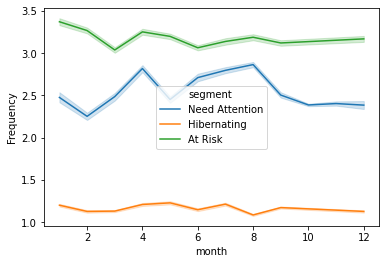

In [ ]:
#Aylara gore sıklıgın , segment kırılımında incelenmesi
sns.lineplot(x = "month", y = "Frequency", hue = "segment", data = dff);

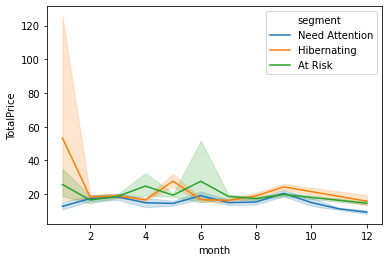

In [ ]:
# Aylara gore toplam harcamanın , segment kırılımında incelenmesi.
sns.lineplot(x = "month", y = "TotalPrice", hue = "segment", data = dff);

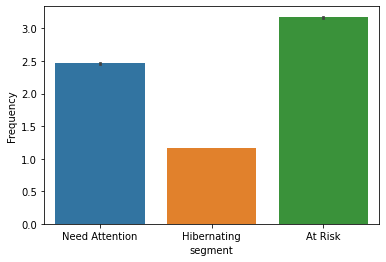

In [ ]:
#Belirlediğimiz 3 segmente gore sıklıgın incelenmesi.
sns.barplot(x = "segment", y = "Frequency", data = dff)

In [ ]:
# Segmentlerin recency , frequency ve monetary degerlerine gore ortalama ve medyanın incelenmesi.
rfm[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","median","count"])

Recency              Frequency              Monetary  \
                       mean median count      mean median count     mean   
segment                                                                    
About to Sleep        52.37     52   353      1.16      1   353   472.55   
At Risk              153.04    138   594      2.87      3   594  1079.81   
Can't Loose          131.05    106    64      8.31      7    64  2791.01   
Champions              5.37      4   632     12.34      8   632  6866.78   
Hibernating          216.66    218  1069      1.10      1  1069   488.86   
Loyal Customers       32.69     29   820      6.44      5   820  2862.89   
Need Attention        51.27     51   184      2.32      2   184   894.49   
New Customers          6.43      7    42      1.00      1    42   388.21   
Potential Loyalists   16.37     17   486      2.01      2   486  1041.34   
Promising             22.42     22    95      1.00      1    95   290.91   

                                   
                     median count  
segment                            
About to Sleep       331.95   353  
At Risk              675.16   594  
Can't Loose         2236.74    64  
Champions           2613.85   632  
Hibernating          293.00  1069  
Loyal Customers     1737.83   820  
Need Attention       637.78   184  
New Customers        274.50    42  
Potential Loyalists  524.00   486  
Promising            219.00    95

Burada analiz etmek için 3 tane hedef segment belirliyorum. Bu segmentler : At Risk , Hibernating , Need Attention gruplarıdır. Bu üç segmentin ortalama ve medyan değerleri birbirine yakın olduğu için normal dağılıyor olarak kaul ediyorum. Şunu biliyoruz ; önemli olan eldeki müşteriler bunları kaybetmet istemeyiz. Bu arada yeni müşteriye de açığız.

"Hibernating" ve "At Risk" müşteri gruplarına şöyle bir mail yollayabiliriz : Firmamız müşteri talep yoğunluğunu en iyi şekilde karşılayıp müşteri memnuniyeti sağladığı için "x adet hediye verilecektir" , sizlere ilginizden dolayı teşekkür ederiz. Bunu yapmamız talep edilir olduğumuzu ve talep edenlerin bizden memnun olduğu hissini yaratacaktır. Ayrıca yeni hediye fikri de uykuda ve risk altında olan grubumuzu heyecanlandıracaktır.

"Need Attention" grubunu inceledik. Yukarıdaki grafikten anlaşılacağı üzere ; müşteri sıklığı aylara göre incelendiğinde "At Risk" grubundan daha riskli gözükmektedir. Barplot bunu net bir şekilde gösteriyor. "Need Attention" sınıfı frekans grafiğinden görüldüğü gibi mevsim geçişlerinde bir düşüş yaşıyor olabilir , belki de bilinçaltında terk edilme korkuları olabilir. Bundan dolayı onları sevdiğimizi ve hep yanlarında olacağımızla ilgili mesaj atabiliriz.

In [ ]:
#yeni musteri numaraları
rfm[rfm.segment == "New Customers"].index

Float64Index([12367.0, 12442.0, 12478.0, 12479.0, 12558.0, 12587.0, 12650.0,
              12660.0, 12713.0, 12953.0, 12966.0, 13017.0, 13153.0, 13188.0,
              13298.0, 13349.0, 13428.0, 13436.0, 13560.0, 13790.0, 13844.0,
              14087.0, 14093.0, 14204.0, 14219.0, 14349.0, 14480.0, 14569.0,
              14578.0, 14601.0, 14804.0, 14954.0, 15097.0, 15148.0, 15195.0,
              15318.0, 15471.0, 15520.0, 15539.0, 15540.0, 15619.0, 15721.0],
             dtype='float64', name='Customer ID')

In [ ]:
yeni_df = pd.DataFrame()
yeni_df["LoyalCustomersID"] = rfm[rfm.segment == "Loyal Customers"].index
yeni_df.head()
yeni_df.to_csv("rfm_loyal_customers.csv")

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [ ]:
df.Description.nunique()

4207